In [1]:
# from pathlib import Path

# repository_path = Path('..').resolve()

# !pip install -Uqq {repository_path}
# %pip install -e ..
    


# !export PYTHONPATH=$PYTHONPATH:{repository_path}
# !echo $PYTHONPATH

<a target="_blank" href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/walkthrough.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import glider.visualize as visualize
import glider.vehicle as vehicle

import mediapy as media

In [3]:
from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle
from glider.vehicle import Vehicle

frames = []

def concave_prism_vertices():
    return [
        [0.0, 0.0, 0.0],  # inner base point
        [1.0, -1.0, 1.0],  # base
        [1.0, -1.0, -1.0],  # base
        [-1.0, -1.0, -1.0],  # base
        [-1.0, -1.0, 1.0],  # base
        [0.0, 1.0, 0.0],  # pyramid tip
    ]


def concave_prism_faces():
    return [
        [1, 2, 0],
        [2, 3, 0],
        [3, 4, 0],
        [4, 1, 0],
        [2, 1, 5],
        [3, 2, 5],
        [4, 3, 5],
        [1, 4, 5],
    ]

population = [Vehicle(vertices=concave_prism_vertices(), faces=concave_prism_faces()) for _ in range(100)] 
for i in range(300):
    population = iterate_population(
        population,
        survival_weight = 0.5,
        cloning_weight = 0.5,
    )

    if i % 10 == 0:
        print("Iteration:", i)
        winning_glider = population[0]
        print("Fitness:", fitness_func(winning_glider))
        # vehicle.Vehicle(vertices=winning_genes).show()
        frames.append(view_vehicle(*winning_glider.create_glider_from_vertices()))


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
media.show_video(frames, fps=3)

""

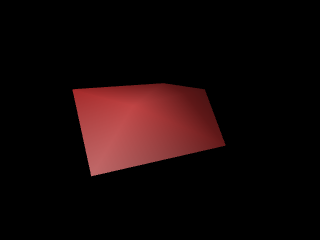

In [ ]:
v = vehicle.Vehicle(vertices=population[0])
v.show()

In [ ]:
import glider.simulation as sim

glider_xml, glider_asset = v.create_glider_from_vertices()
world_xml = sim.drop_test_glider(glider_xml, glider_asset)

from pathlib import Path

p = Path('../assets/worlds/drop_test.xml').resolve()
p.parent.mkdir(parents=True, exist_ok=True)

with open('../assets/worlds/drop_test.xml', 'w') as f:
    f.write(world_xml)